In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')

In [22]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3686 non-null   object 
 1   open       3686 non-null   float64
 2   high       3686 non-null   float64
 3   low        3686 non-null   float64
 4   close      3686 non-null   float64
 5   adj_close  3686 non-null   float64
 6   volume     3686 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 201.7+ KB


In [24]:
df.describe()

,open,high,low,close,adj_close,volume
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3.686000e+03
mean,84.363559,86.215183,82.378602,84.333196,84.333196,9.647929e+07
std,111.139998,113.621878,108.402755,111.038054,111.038054,7.741740e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,12.236333,12.442833,11.994000,12.210000,12.210000,4.923488e+07
50%,18.254333,18.535000,17.890000,18.254000,18.254000,8.191575e+07
75%,182.374996,185.847500,177.629997,182.337498,182.337498,1.216508e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,9.140820e+08


<ipython-input-25-38befe621a27>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


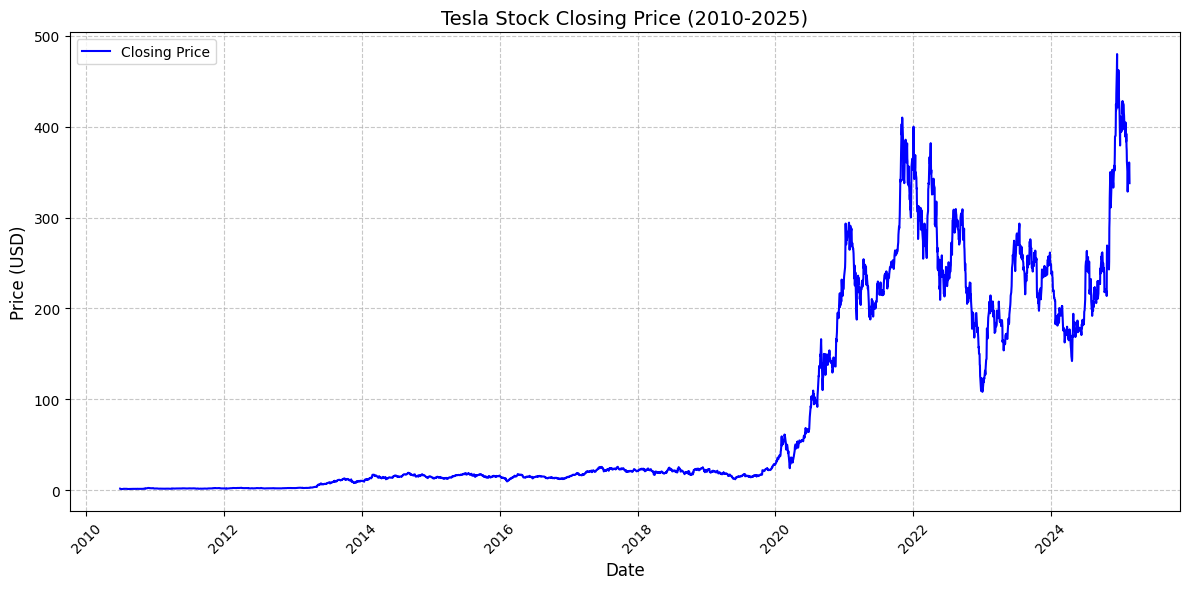

In [25]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue', linewidth=1.5)
plt.title('Tesla Stock Closing Price (2010-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

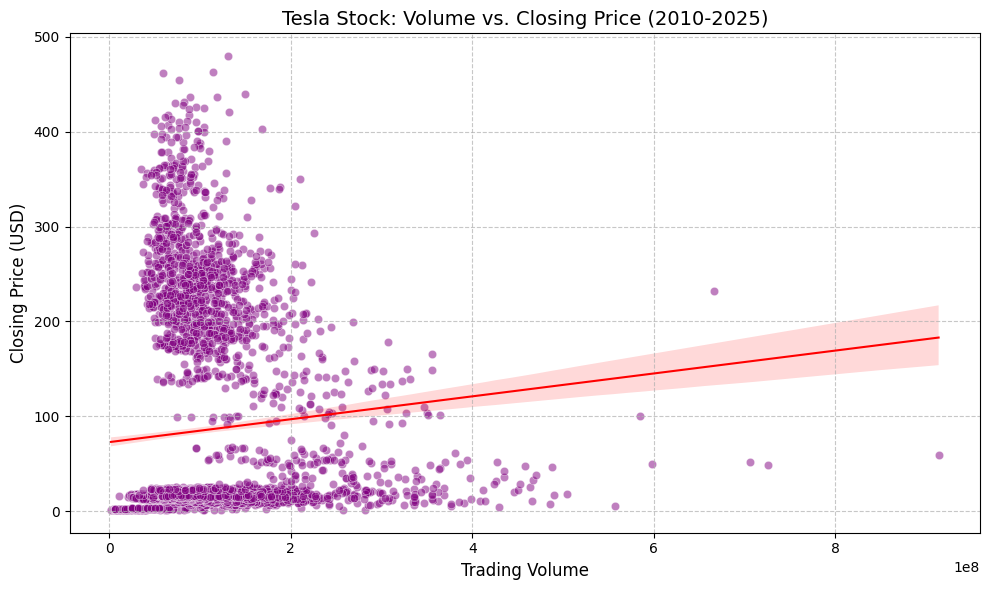

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume', y='close', data=df, alpha=0.5, color='purple')
sns.regplot(x='volume', y='close', data=df, scatter=False, color='red', line_kws={'linewidth': 1.5})
plt.title('Tesla Stock: Volume vs. Closing Price (2010-2025)', fontsize=14)
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-28-1996b59d2b5f>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


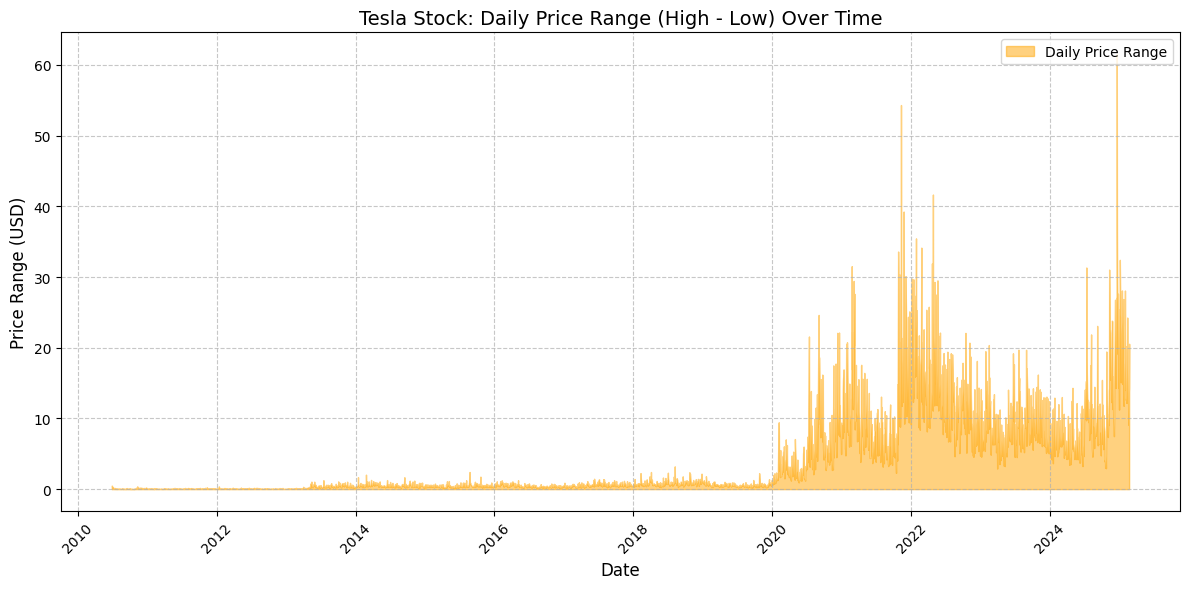

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate daily price range
df['price_range'] = df['high'] - df['low']

# Plot
plt.figure(figsize=(12, 6))
plt.fill_between(df['date'], df['price_range'], color='orange', alpha=0.5, label='Daily Price Range')
plt.title('Tesla Stock: Daily Price Range (High - Low) Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Range (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-30-b1e8c0f5afe5>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


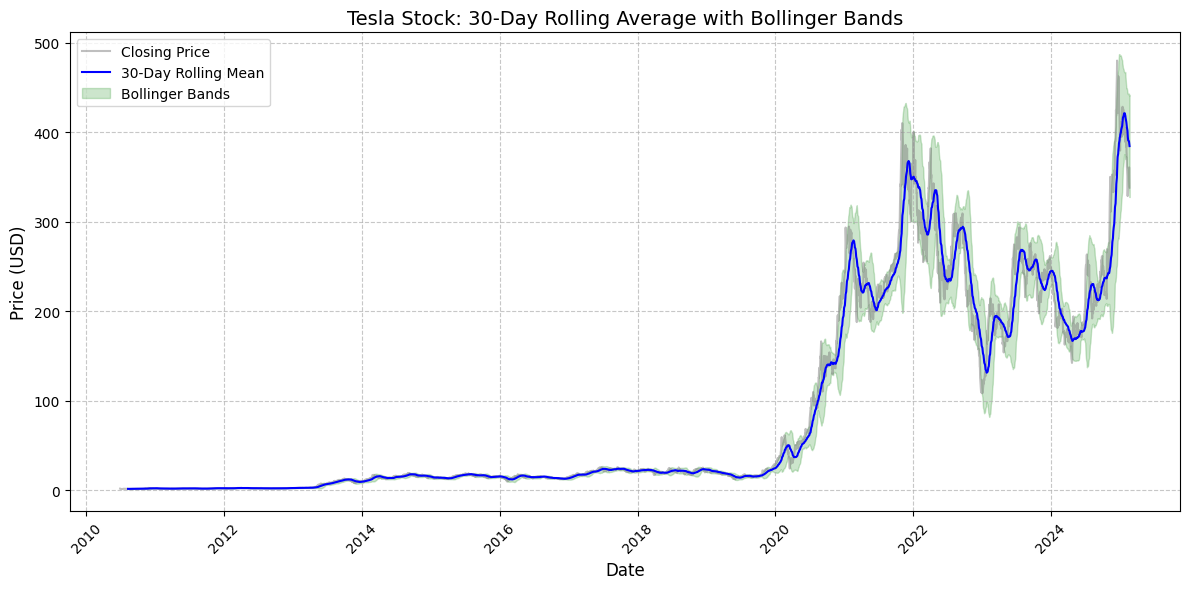

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate rolling statistics
df['rolling_mean'] = df['close'].rolling(window=30).mean()
df['rolling_std'] = df['close'].rolling(window=30).std()
df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * 2)
df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * 2)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='gray', alpha=0.5)
plt.plot(df['date'], df['rolling_mean'], label='30-Day Rolling Mean', color='blue')
plt.fill_between(df['date'], df['lower_band'], df['upper_band'], color='green', alpha=0.2, label='Bollinger Bands')
plt.title('Tesla Stock: 30-Day Rolling Average with Bollinger Bands', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-32-4adf236855e1>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


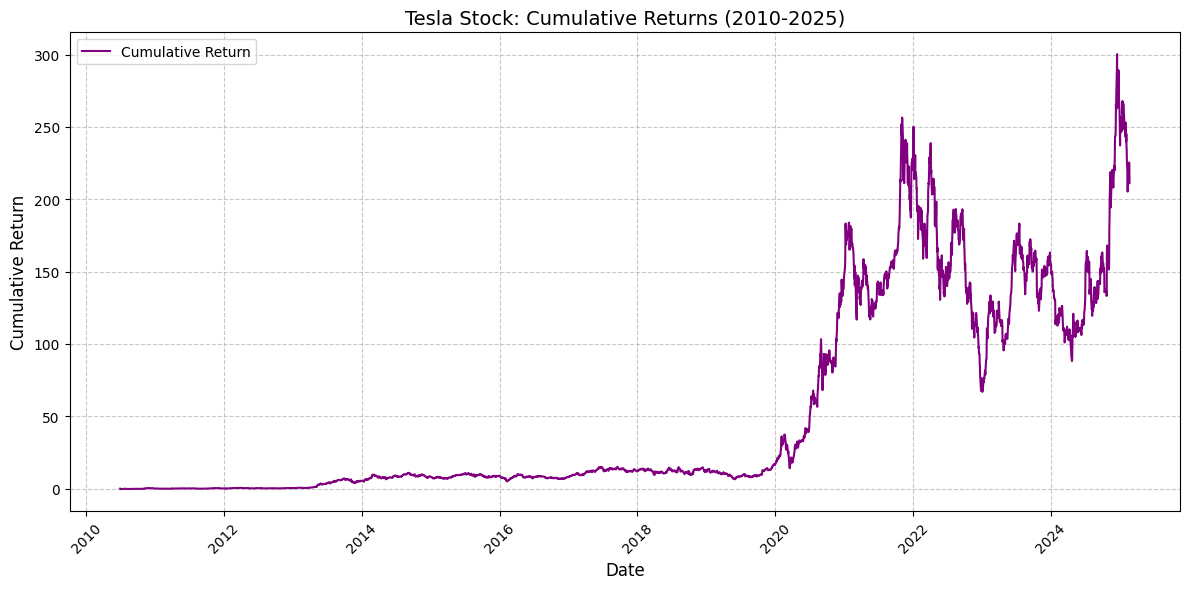

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate daily returns and cumulative returns
df['daily_return'] = df['close'].pct_change()
df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cumulative_return'], label='Cumulative Return', color='purple', linewidth=1.5)
plt.title('Tesla Stock: Cumulative Returns (2010-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-40-889e85e99383>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Epoch [10/200], Loss: 0.049839
Epoch [20/200], Loss: 0.035914
Epoch [30/200], Loss: 0.024034
Epoch [40/200], Loss: 0.014224
Epoch [50/200], Loss: 0.006750
Epoch [60/200], Loss: 0.002336
Epoch [70/200], Loss: 0.000708
Epoch [80/200], Loss: 0.000363
Epoch [90/200], Loss: 0.000285
Epoch [100/200], Loss: 0.000256
Epoch [110/200], Loss: 0.000239
Epoch [120/200], Loss: 0.000229
Epoch [130/200], Loss: 0.000222
Epoch [140/200], Loss: 0.000215
Epoch [150/200], Loss: 0.000210
Epoch [160/200], Loss: 0.000206
Epoch [170/200], Loss: 0.000203
Epoch [180/200], Loss: 0.000199
Epoch [190/200], Loss: 0.000196
Epoch [200/200], Loss: 0.000193


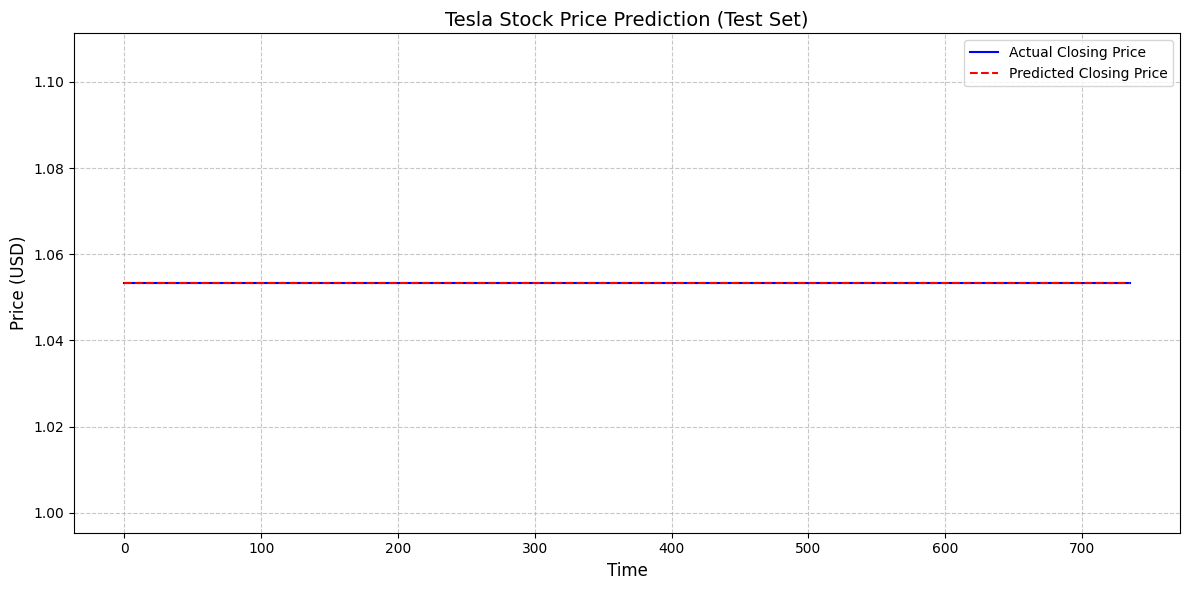

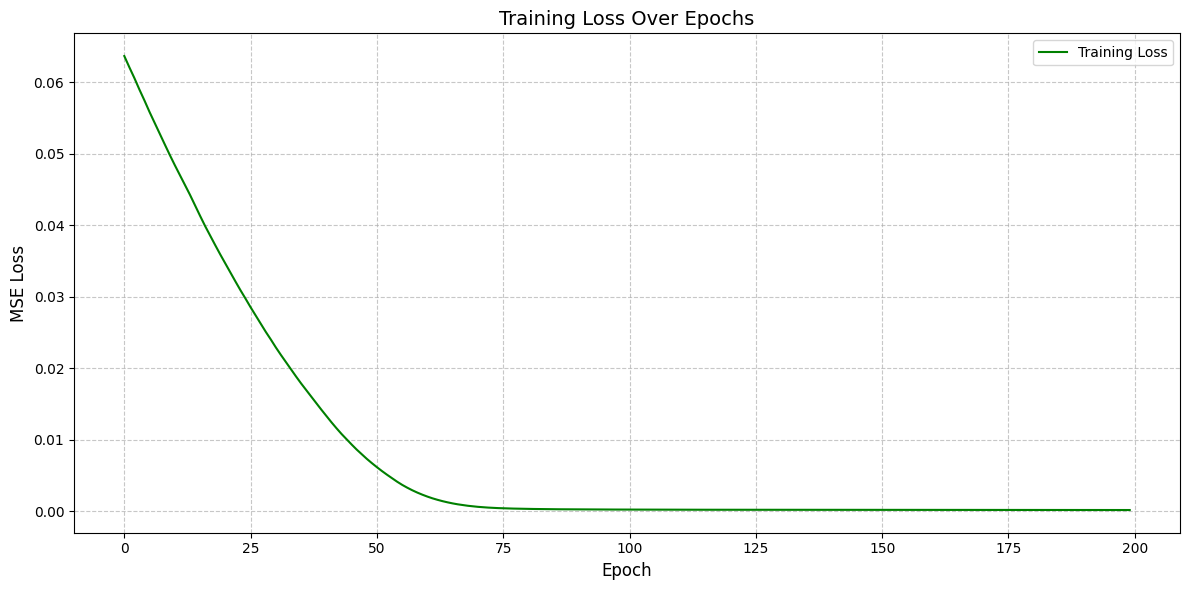

In [40]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# 1. Load and preprocess the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')
df['date'] = pd.to_datetime(df['date'])

# Select features and target
features = ['open', 'high', 'low', 'close', 'volume']
target = 'close'
data = df[features].values

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences (e.g., use past 10 days to predict the next day)
sequence_length = 10
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length, 3])

X = np.array(X)
y = np.array(y)

# Split into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# 2. Define a custom Dataset
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. Define the Neural Network
class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size * sequence_length, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = len(features)
hidden_size = 64
output_size = 1

model = StockPredictor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000003)

# 4. Train the model
num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))  # Reshape y_batch to (batch_size, 1)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')

# 5. Evaluate the model
model.eval()
test_preds = []
test_actuals = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        test_preds.extend(outputs.squeeze().tolist())
        test_actuals.extend(y_batch.tolist())

# Inverse transform predictions and actuals (only for 'close' column)
test_preds = scaler.inverse_transform(
    np.concatenate([np.zeros((len(test_preds), 4)), np.array(test_preds).reshape(-1, 1)], axis=1)
)[:, 3]
test_actuals = scaler.inverse_transform(
    np.concatenate([np.zeros((len(test_actuals), 4)), np.array(test_actuals).reshape(-1, 1)], axis=1)
)[:, 3]

# 6. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_actuals, label='Actual Closing Price', color='blue')
plt.plot(test_preds, label='Predicted Closing Price', color='red', linestyle='--')
plt.title('Tesla Stock Price Prediction (Test Set)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='green')
plt.title('Training Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-46-17f75c7b6a6b>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Epoch [10/200], Loss: 0.024220
Epoch [20/200], Loss: 0.018577
Epoch [30/200], Loss: 0.013665
Epoch [40/200], Loss: 0.009214
Epoch [50/200], Loss: 0.005478
Epoch [60/200], Loss: 0.002830
Epoch [70/200], Loss: 0.001341
Epoch [80/200], Loss: 0.000748
Epoch [90/200], Loss: 0.000533
Epoch [100/200], Loss: 0.000424
Epoch [110/200], Loss: 0.000353
Epoch [120/200], Loss: 0.000306
Epoch [130/200], Loss: 0.000275
Epoch [140/200], Loss: 0.000252
Epoch [150/200], Loss: 0.000238
Epoch [160/200], Loss: 0.000229
Epoch [170/200], Loss: 0.000223
Epoch [180/200], Loss: 0.000220
Epoch [190/200], Loss: 0.000218
Epoch [200/200], Loss: 0.000216


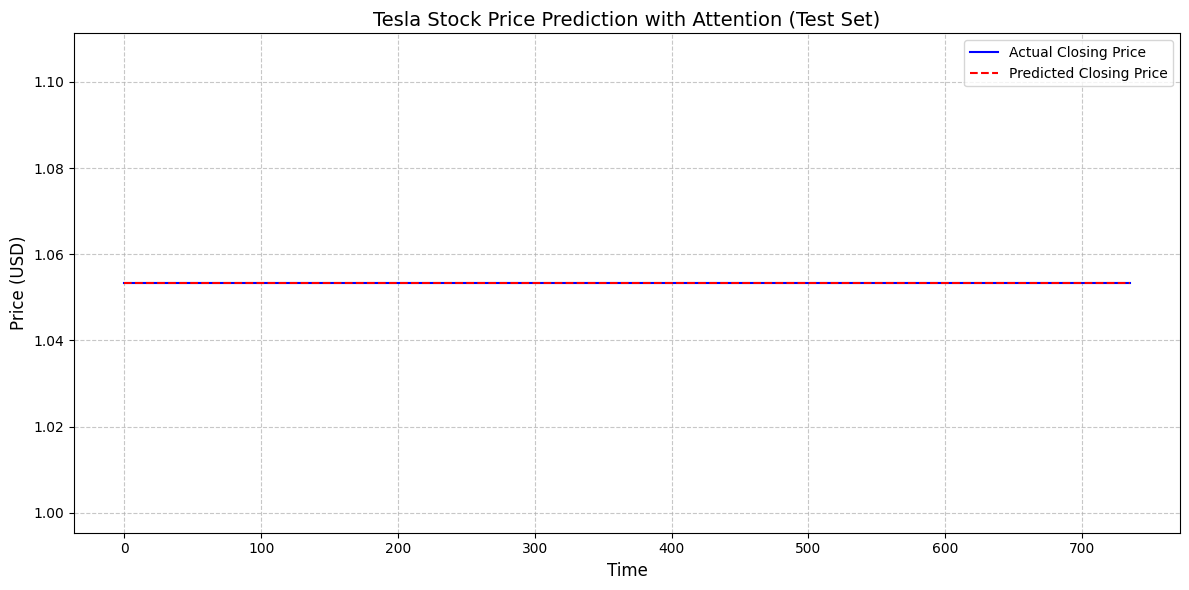

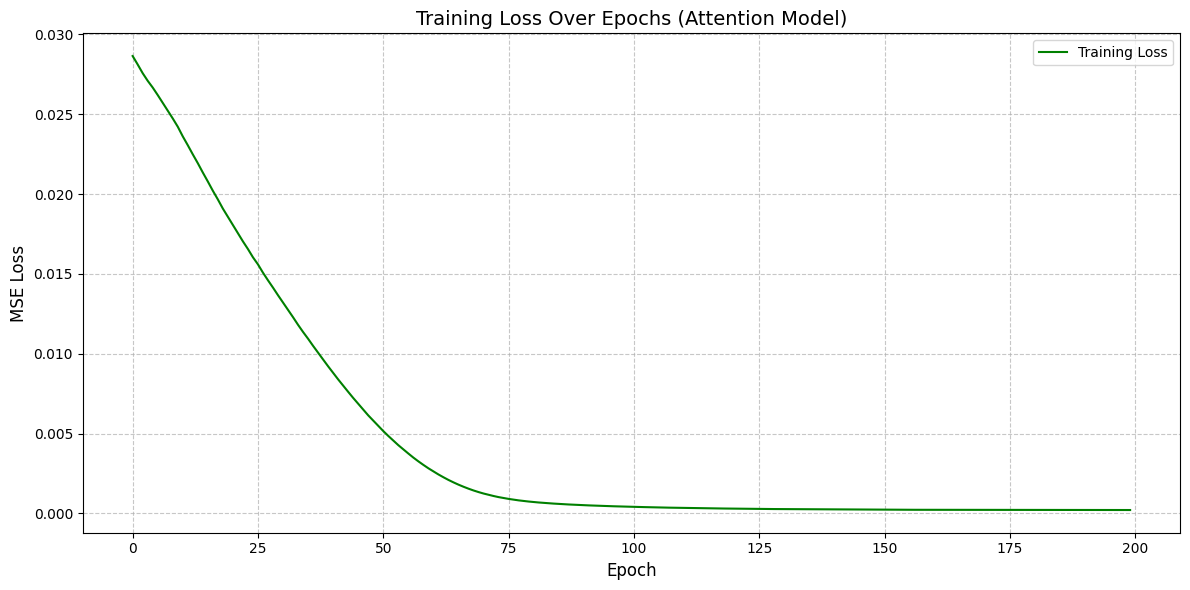

In [46]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# 1. Load and preprocess the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')
df['date'] = pd.to_datetime(df['date'])

# Select features and target
features = ['open', 'high', 'low', 'close', 'volume']
target = 'close'
data = df[features].values

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences (e.g., use past 10 days to predict the next day)
sequence_length = 10
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length, 3])  # Index 3 is 'close'

X = np.array(X)
y = np.array(y)

# Split into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# 2. Define a custom Dataset
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. Define the Attention-based Model
class AttentionStockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, output_size):
        super(AttentionStockPredictor, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Linear layer to project input features to hidden size
        self.input_proj = nn.Linear(input_size, hidden_size)
        
        # Multi-head attention layer
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_heads)
        
        # Feedforward layers after attention
        self.fc1 = nn.Linear(hidden_size * sequence_length, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)
        # Project input features to hidden size
        x = self.input_proj(x)  # (batch_size, sequence_length, hidden_size)
        
        # Transpose for attention: (sequence_length, batch_size, hidden_size)
        x = x.transpose(0, 1)
        
        # Apply attention (query, key, value are the same input)
        attn_output, _ = self.attention(x, x, x)
        
        # Transpose back: (batch_size, sequence_length, hidden_size)
        attn_output = attn_output.transpose(0, 1)
        
        # Flatten and pass through feedforward layers
        x = attn_output.reshape(attn_output.size(0), -1)  # (batch_size, sequence_length * hidden_size)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # (batch_size, output_size)
        return x

# Hyperparameters
input_size = len(features)  # 5 features: open, high, low, close, volume
hidden_size = 16
num_heads = 4  # Number of attention heads (must divide hidden_size evenly)
output_size = 1  # Predicting next day's close

model = AttentionStockPredictor(input_size, hidden_size, num_heads, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000003)

# 4. Train the model
num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))  # Reshape y_batch to (batch_size, 1)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')

# 5. Evaluate the model
model.eval()
test_preds = []
test_actuals = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        test_preds.extend(outputs.squeeze().tolist())
        test_actuals.extend(y_batch.tolist())

# Inverse transform predictions and actuals (only for 'close' column)
test_preds = scaler.inverse_transform(
    np.concatenate([np.zeros((len(test_preds), 4)), np.array(test_preds).reshape(-1, 1)], axis=1)
)[:, 3]
test_actuals = scaler.inverse_transform(
    np.concatenate([np.zeros((len(test_actuals), 4)), np.array(test_actuals).reshape(-1, 1)], axis=1)
)[:, 3]

# 6. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_actuals, label='Actual Closing Price', color='blue')
plt.plot(test_preds, label='Predicted Closing Price', color='red', linestyle='--')
plt.title('Tesla Stock Price Prediction with Attention (Test Set)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='green')
plt.title('Training Loss Over Epochs (Attention Model)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-49-1d4de1230453>:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Epoch [10/100], Train RMSE: 0.0087, Val RMSE: 0.0717
Early stopping triggered at epoch 13
Test RMSE: 19.6019


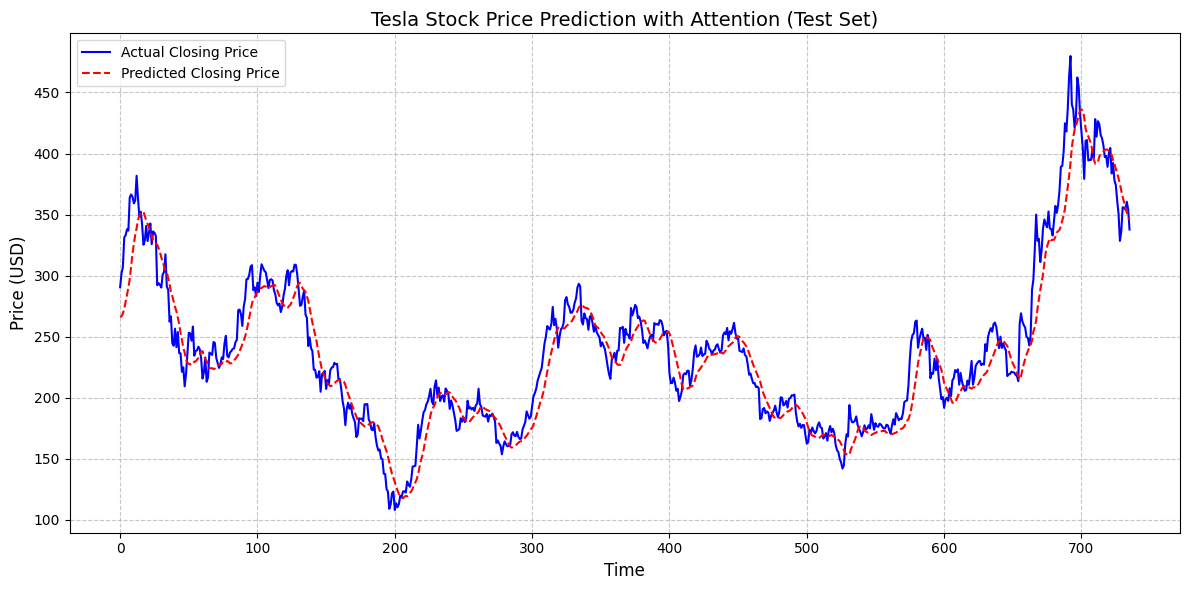

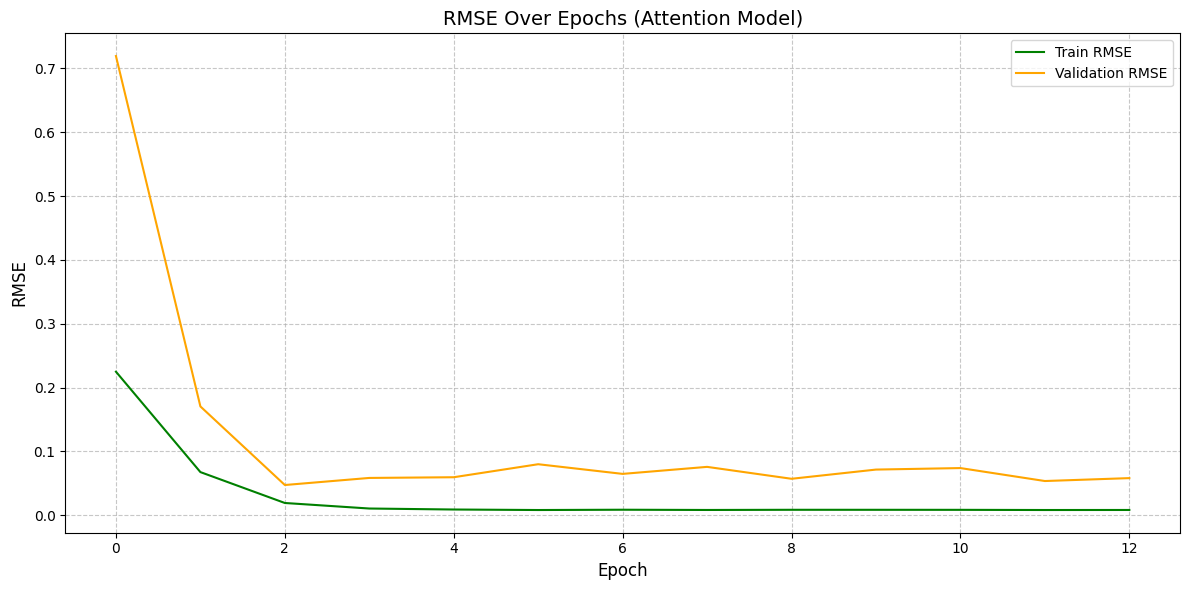

In [49]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from copy import deepcopy

# 1. Load and preprocess the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')
df['date'] = pd.to_datetime(df['date'])

# Select features and target
features = ['open', 'high', 'low', 'close', 'volume']
target = 'close'
data = df[features].values

# Create sequences (e.g., use past 10 days to predict the next day)
sequence_length = 10
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length, 3])  # Index 3 is 'close'

X = np.array(X)
y = np.array(y)

# Split into train and test sets (80% train, 20% test) BEFORE normalization
train_size = int(0.8 * len(X))
X_train_raw, X_test_raw = X[:train_size], X[train_size:]
y_train_raw, y_test_raw = y[:train_size], y[train_size:]

# Normalize the data (fit scaler on training data only)
scaler = MinMaxScaler()
X_train_flat = X_train_raw.reshape(-1, len(features))  # Flatten for scaling
X_train_scaled = scaler.fit_transform(X_train_flat).reshape(X_train_raw.shape)
X_test_flat = X_test_raw.reshape(-1, len(features))
X_test_scaled = scaler.transform(X_test_flat).reshape(X_test_raw.shape)

# Normalize y (target) separately for inverse transform later
scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train_raw.reshape(-1, 1)).flatten()
y_test_scaled = scaler_target.transform(y_test_raw.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train_scaled)
y_train = torch.FloatTensor(y_train_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_test = torch.FloatTensor(y_test_scaled)

# 2. Define a custom Dataset
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. Define the Attention-based Model
class AttentionStockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, output_size):
        super(AttentionStockPredictor, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.input_proj = nn.Linear(input_size, hidden_size)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_heads)
        self.fc1 = nn.Linear(hidden_size * sequence_length, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.input_proj(x)
        x = x.transpose(0, 1)  # (sequence_length, batch_size, hidden_size)
        attn_output, _ = self.attention(x, x, x)
        attn_output = attn_output.transpose(0, 1)
        x = attn_output.reshape(attn_output.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters
input_size = len(features)  # 5 features
hidden_size = 8
num_heads = 4
output_size = 1

model = AttentionStockPredictor(input_size, hidden_size, num_heads, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model with early stopping
num_epochs = 100
patience = 10  # Number of epochs to wait for improvement
best_loss = float('inf')
best_model = None
early_stop_counter = 30
train_rmse = []
val_rmse = []

# Split train into train and validation (90% train, 10% validation)
val_size = int(0.1 * len(X_train))
X_train_sub, X_val = X_train[:-val_size], X_train[-val_size:]
y_train_sub, y_val = y_train[:-val_size], y_train[-val_size:]
train_sub_dataset = StockDataset(X_train_sub, y_train_sub)
val_dataset = StockDataset(X_val, y_val)
train_sub_loader = DataLoader(train_sub_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_sub_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_rmse.append(np.sqrt(train_loss / len(train_sub_loader)))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            val_loss += loss.item()
    
    val_rmse_epoch = np.sqrt(val_loss / len(val_loader))
    val_rmse.append(val_rmse_epoch)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train RMSE: {train_rmse[-1]:.4f}, Val RMSE: {val_rmse_epoch:.4f}')

    # Early stopping
    if val_rmse_epoch < best_loss:
        best_loss = val_rmse_epoch
        best_model = deepcopy(model.state_dict())
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

# Load the best model
model.load_state_dict(best_model)

# 5. Evaluate the model
model.eval()
test_preds = []
test_actuals = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        test_preds.extend(outputs.squeeze().tolist())
        test_actuals.extend(y_batch.tolist())

# Inverse transform predictions and actuals
test_preds = scaler_target.inverse_transform(np.array(test_preds).reshape(-1, 1)).flatten()
test_actuals = scaler_target.inverse_transform(np.array(test_actuals).reshape(-1, 1)).flatten()

# Calculate test RMSE
test_rmse = np.sqrt(np.mean((test_preds - test_actuals) ** 2))
print(f'Test RMSE: {test_rmse:.4f}')

# 6. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_actuals, label='Actual Closing Price', color='blue')
plt.plot(test_preds, label='Predicted Closing Price', color='red', linestyle='--')
plt.title('Tesla Stock Price Prediction with Attention (Test Set)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.plot(train_rmse, label='Train RMSE', color='green')
plt.plot(val_rmse, label='Validation RMSE', color='orange')
plt.title('RMSE Over Epochs (Attention Model)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-54-f3c695633ee5>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Epoch [10/100], Train RMSE: 0.0526, Val RMSE: 0.3772
Epoch [20/100], Train RMSE: 0.0152, Val RMSE: 0.1024
Epoch [30/100], Train RMSE: 0.0128, Val RMSE: 0.0719
Epoch [40/100], Train RMSE: 0.0119, Val RMSE: 0.0701
Epoch [50/100], Train RMSE: 0.0117, Val RMSE: 0.0731
Epoch [60/100], Train RMSE: 0.0117, Val RMSE: 0.0768
Epoch [70/100], Train RMSE: 0.0117, Val RMSE: 0.0767
Epoch [80/100], Train RMSE: 0.0116, Val RMSE: 0.0752
Epoch [90/100], Train RMSE: 0.0116, Val RMSE: 0.0774
Epoch [100/100], Train RMSE: 0.0115, Val RMSE: 0.0773
Test RMSE: 22.8572


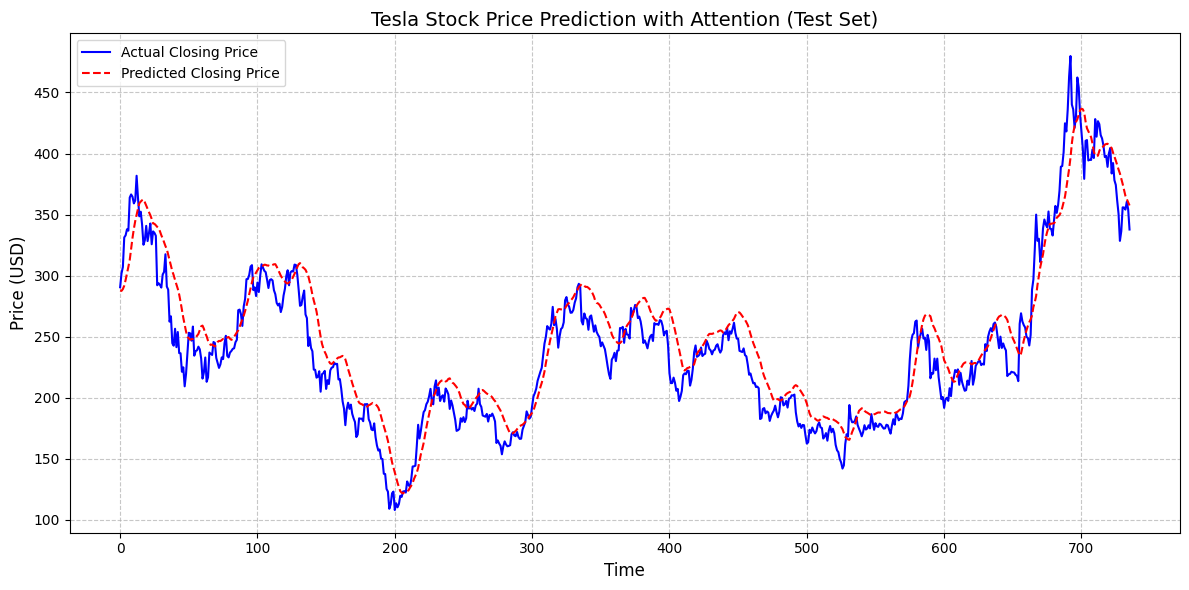

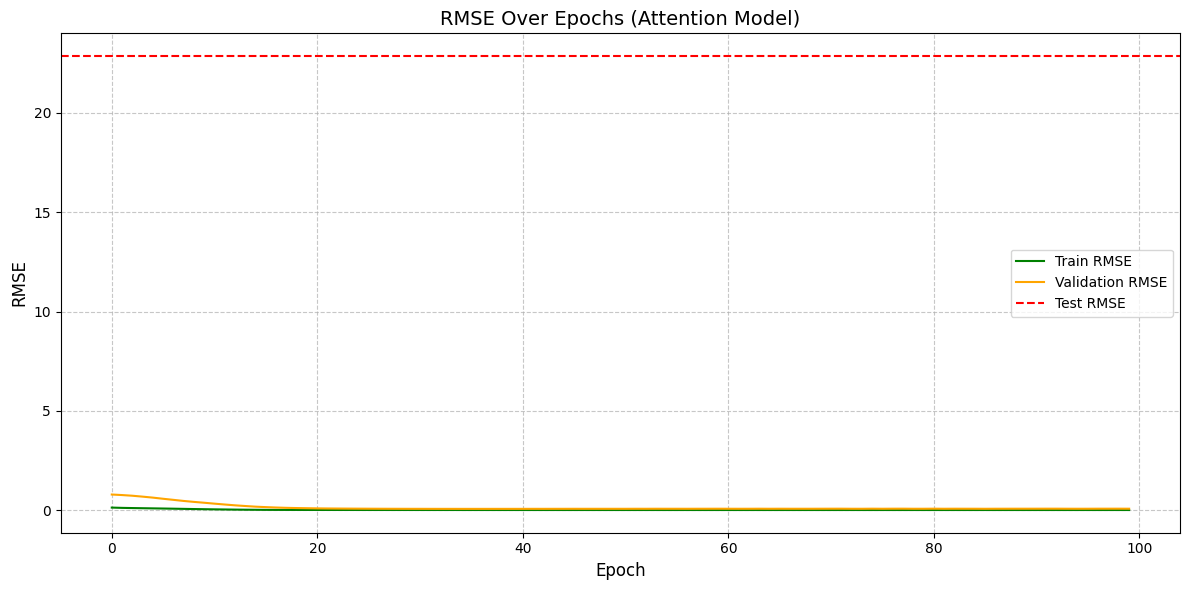

In [54]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# 1. Load and preprocess the data
df = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TESLA 2010-2025.csv')
df['date'] = pd.to_datetime(df['date'])

# Select features and target
features = ['open', 'high', 'low', 'close', 'volume']
target = 'close'
data = df[features].values

# Create sequences (e.g., use past 10 days to predict the next day)
sequence_length = 10
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length, 3])  # Index 3 is 'close'

X = np.array(X)
y = np.array(y)

# Split into train and test sets (80% train, 20% test) BEFORE normalization
train_size = int(0.8 * len(X))
X_train_raw, X_test_raw = X[:train_size], X[train_size:]
y_train_raw, y_test_raw = y[:train_size], y[train_size:]

# Further split train into train and validation (90% train, 10% val)
val_size = int(0.1 * len(X_train_raw))
X_train_sub_raw, X_val_raw = X_train_raw[:-val_size], X_train_raw[-val_size:]
y_train_sub_raw, y_val_raw = y_train_raw[:-val_size], y_train_raw[-val_size:]

# Normalize the data (fit scaler on training subset only)
scaler = MinMaxScaler()
X_train_sub_flat = X_train_sub_raw.reshape(-1, len(features))
X_train_sub_scaled = scaler.fit_transform(X_train_sub_flat).reshape(X_train_sub_raw.shape)
X_val_flat = X_val_raw.reshape(-1, len(features))
X_val_scaled = scaler.transform(X_val_flat).reshape(X_val_raw.shape)
X_test_flat = X_test_raw.reshape(-1, len(features))
X_test_scaled = scaler.transform(X_test_flat).reshape(X_test_raw.shape)

# Normalize y (target) separately
scaler_target = MinMaxScaler()
y_train_sub_scaled = scaler_target.fit_transform(y_train_sub_raw.reshape(-1, 1)).flatten()
y_val_scaled = scaler_target.transform(y_val_raw.reshape(-1, 1)).flatten()
y_test_scaled = scaler_target.transform(y_test_raw.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_sub = torch.FloatTensor(X_train_sub_scaled)
y_train_sub = torch.FloatTensor(y_train_sub_scaled)
X_val = torch.FloatTensor(X_val_scaled)
y_val = torch.FloatTensor(y_val_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_test = torch.FloatTensor(y_test_scaled)

# 2. Define a custom Dataset
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train_sub, y_train_sub)
val_dataset = StockDataset(X_val, y_val)
test_dataset = StockDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. Define the Attention-based Model
class AttentionStockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, output_size):
        super(AttentionStockPredictor, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.input_proj = nn.Linear(input_size, hidden_size)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_heads)
        self.fc1 = nn.Linear(hidden_size * sequence_length, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.input_proj(x)
        x = x.transpose(0, 1)  # (sequence_length, batch_size, hidden_size)
        attn_output, _ = self.attention(x, x, x)
        attn_output = attn_output.transpose(0, 1)
        x = attn_output.reshape(attn_output.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters
input_size = len(features)  # 5 features
hidden_size = 32
num_heads = 4
output_size = 1

model = AttentionStockPredictor(input_size, hidden_size, num_heads, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# 4. Train the model (no early stopping)
num_epochs = 100
train_rmse = []
val_rmse = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_rmse_epoch = np.sqrt(train_loss / len(train_loader))
    train_rmse.append(train_rmse_epoch)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            val_loss += loss.item()
    
    val_rmse_epoch = np.sqrt(val_loss / len(val_loader))
    val_rmse.append(val_rmse_epoch)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train RMSE: {train_rmse_epoch:.4f}, Val RMSE: {val_rmse_epoch:.4f}')

# 5. Evaluate the model
model.eval()
test_preds = []
test_actuals = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        test_preds.extend(outputs.squeeze().tolist())
        test_actuals.extend(y_batch.tolist())

# Inverse transform predictions and actuals
test_preds = scaler_target.inverse_transform(np.array(test_preds).reshape(-1, 1)).flatten()
test_actuals = scaler_target.inverse_transform(np.array(test_actuals).reshape(-1, 1)).flatten()

# Calculate test RMSE
test_rmse = np.sqrt(np.mean((test_preds - test_actuals) ** 2))
print(f'Test RMSE: {test_rmse:.4f}')

# 6. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_actuals, label='Actual Closing Price', color='blue')
plt.plot(test_preds, label='Predicted Closing Price', color='red', linestyle='--')
plt.title('Tesla Stock Price Prediction with Attention (Test Set)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot RMSE for train, val, and test
plt.figure(figsize=(12, 6))
plt.plot(train_rmse, label='Train RMSE', color='green')
plt.plot(val_rmse, label='Validation RMSE', color='orange')
plt.axhline(y=test_rmse, label='Test RMSE', color='red', linestyle='--')
plt.title('RMSE Over Epochs (Attention Model)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()